In [1]:
from sklearn import datasets, linear_model, metrics, preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import scipy
import time
from math import e
#ustawienia
time_multiplicator = 100
seed = 244810
samples = 2410

def norm(x):    
    for i in range(x.shape[1]):
        x_min = np.min(x[:,i])
        x_max = np.max(x[:,i])

        x[:,i] = (x[:,i] - x_min)/(x_max - x_min)

    return x

In [2]:
moons, moons_c = datasets.make_moons(n_samples=samples, noise = 0.1, random_state=seed)

M_train, M_test, mc_train, mc_test = train_test_split(moons, moons_c, test_size=0.2, random_state=0)

# M_train = norm(M_train)
# M_test = norm(M_test)

In [3]:
M_train[:,0].reshape(len(M_train[:,0]),1)

array([[ 0.42510438],
       [-0.06450258],
       [-1.04363919],
       ...,
       [ 1.91706219],
       [ 0.57696914],
       [ 0.05800266]])

In [4]:

a = PolynomialFeatures(degree=3, include_bias=False).fit_transform(M_train[:,0].reshape(len(M_train[:,0]),1))
a

array([[ 4.25104376e-01,  1.80713731e-01,  7.68221979e-02],
       [-6.45025800e-02,  4.16058283e-03, -2.68368327e-04],
       [-1.04363919e+00,  1.08918275e+00, -1.13671380e+00],
       ...,
       [ 1.91706219e+00,  3.67512745e+00,  7.04544789e+00],
       [ 5.76969140e-01,  3.32893389e-01,  1.92069213e-01],
       [ 5.80026555e-02,  3.36430804e-03,  1.95138800e-04]])

In [5]:
M_train[:,1]

array([-0.5540655 ,  0.5392343 ,  0.40857054, ...,  0.40489587,
        0.55349394,  0.21181114])

In [6]:
b = PolynomialFeatures(degree=3, include_bias=False).fit_transform(M_train[:,1].reshape(len(M_train[:,1]),1))

In [7]:
ab = np.hstack((a,b))
ab

array([[ 4.25104376e-01,  1.80713731e-01,  7.68221979e-02,
        -5.54065497e-01,  3.06988575e-01, -1.70091777e-01],
       [-6.45025800e-02,  4.16058283e-03, -2.68368327e-04,
         5.39234295e-01,  2.90773625e-01,  1.56795111e-01],
       [-1.04363919e+00,  1.08918275e+00, -1.13671380e+00,
         4.08570544e-01,  1.66929889e-01,  6.82026355e-02],
       ...,
       [ 1.91706219e+00,  3.67512745e+00,  7.04544789e+00,
         4.04895872e-01,  1.63940667e-01,  6.63788995e-02],
       [ 5.76969140e-01,  3.32893389e-01,  1.92069213e-01,
         5.53493940e-01,  3.06355542e-01,  1.69565936e-01],
       [ 5.80026555e-02,  3.36430804e-03,  1.95138800e-04,
         2.11811141e-01,  4.48639597e-02,  9.50268651e-03]])

In [8]:
M_train = PolynomialFeatures(degree=3, include_bias=False).fit_transform(M_train)
M_test = PolynomialFeatures(degree=3, include_bias=False).fit_transform(M_test)

In [9]:
sk_model= linear_model.LogisticRegression()
sk_model.fit(ab,mc_train)
# sk_model.fit(M_train,mc_train)
sk_model.coef_

array([[-2.80717217, -7.27729032,  5.22300631, -6.72207404, -0.03601161,
        -3.1335503 ]])

In [10]:
xx, yy = np.meshgrid(np.arange(0,1.1,0.05),np.arange(0,1.1,0.05))
mesh = np.c_[xx.ravel(), yy.ravel()]

#mesh = PolynomialFeatures(degree=1, include_bias=False).fit_transform(mesh)

In [11]:

c = PolynomialFeatures(degree=3, include_bias=False).fit_transform(mesh[:,0].reshape(len(mesh[:,0]),1))
d = PolynomialFeatures(degree=3, include_bias=False).fit_transform(mesh[:,1].reshape(len(mesh[:,1]),1))
cd = np.hstack((c,d))
cd

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [5.000000e-02, 2.500000e-03, 1.250000e-04, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e-01, 1.000000e-02, 1.000000e-03, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [9.500000e-01, 9.025000e-01, 8.573750e-01, 1.050000e+00,
        1.102500e+00, 1.157625e+00],
       [1.000000e+00, 1.000000e+00, 1.000000e+00, 1.050000e+00,
        1.102500e+00, 1.157625e+00],
       [1.050000e+00, 1.102500e+00, 1.157625e+00, 1.050000e+00,
        1.102500e+00, 1.157625e+00]])

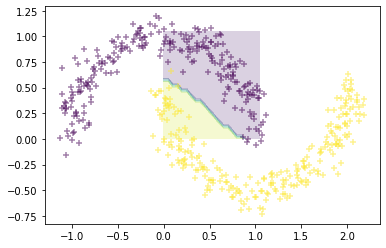

In [12]:
ans = sk_model.predict(cd).reshape(xx.shape)

plt.contourf(xx,yy,ans, alpha=0.2)
plt.scatter(M_test[:,0],M_test[:,1], c=mc_test,marker="+", alpha=0.5)
